In [ ]:
#class to define a node in search space

class Node:
    def __init__(self, state, parent, level, empty):
        self.state = state
        self.parent = parent
        self.level = level
        self.empty = empty

#Check if empty block can move to a particular side
    
def isFeasible(node, action):
    x = node.empty[0]
    y = node.empty[1]
    if action == 3:
        return (x >=0 and x <= 2) and (y-1)>=0 and (y-1) <= 2
    elif action == 2:
        return (x+1) >=0 and (x+1) <= 2 and y>=0 and y <= 2
    elif action == 1:
        return x >=0 and x <= 2 and (y+1)>=0 and (y+1) <=2
    elif action == 0:
        return (x-1) >=0 and (x-1) <= 2 and y>=0 and y <= 2

#Goal Function
    
def checkFinalState(node):
    FINAL_STATE = [
        [0,1,2],
        [3,4,5],
        [6,7,8]
    ]
    for row in range(3):
        for col in range(3):
            if FINAL_STATE[row][col] != node.state[row][col]:
                return False

    return True

#For Printing states

def printState(sol):
    for state in sol:
        for row in state:
            for col in row:
                print(col, end=" ")
            print()
        print()

#Check if this node is already visited

def isVisited(visited, pstate):
    if not visited:
        return False
    for state in visited:
        for row in range(3):
            flag = 0
            for col in range(3):
                if state[row][col] != pstate[row][col]:
                    flag = 1
                    break
            if flag:
                break
        if not flag:
            return True
    return False

#Search continuously through the search space using dfs(order: top,right,down,left)

def play_game(node, solution, visited):
    if (checkFinalState(node)):
        '''
        if this is a solution, add its path to the sol list and continue the search in the hope of finding a better one
        '''
        sol = []
        iter = node
        while (iter):
            sol.append(iter.state)
            iter = iter.parent
        if node.level not in solution.keys():
            solution[node.level] = []
        solution[node.level].append(sol)
        return solution
    action = {'top':0, 'right':1, 'left':3, 'down':2}
    visited.append(node.state)
    if isFeasible(node, action['top']):
        state = [[] for i in node.state]
        for index in range(len(node.state)):
            state[index].extend(node.state[index])
        empty = (node.empty[0]-1, node.empty[1])
        state[node.empty[0]][node.empty[1]], state[empty[0]][empty[1]] = state[empty[0]][empty[1]], state[node.empty[0]][node.empty[1]]
        if not isVisited(visited, state):
            newNode = Node(state, node, node.level+1, empty)
            solution = play_game(newNode, solution, visited)
    if isFeasible(node, action['right']):
        state = [[] for i in node.state]
        for index in range(len(node.state)):
            state[index].extend(node.state[index])
        empty = (node.empty[0], node.empty[1]+1)
        state[node.empty[0]][node.empty[1]], state[empty[0]][empty[1]] = state[empty[0]][empty[1]], state[node.empty[0]][node.empty[1]]
        if not isVisited(visited, state):
            newNode = Node(state, node, node.level+1, empty)
            solution = play_game(newNode, solution, visited)
    if isFeasible(node, action['down']):
        state = [[] for i in node.state]
        for index in range(len(node.state)):
            state[index].extend(node.state[index])
        empty = (node.empty[0]+1, node.empty[1])
        state[node.empty[0]][node.empty[1]], state[empty[0]][empty[1]] = state[empty[0]][empty[1]], state[node.empty[0]][node.empty[1]]
        if not isVisited(visited, state):
            newNode = Node(state, node, node.level+1, empty)
            solution = play_game(newNode, solution, visited)
    if isFeasible(node, action['left']):
        state = [[] for i in node.state]
        for index in range(len(node.state)):
            state[index].extend(node.state[index])
        empty = (node.empty[0], node.empty[1]-1)
        state[node.empty[0]][node.empty[1]], state[empty[0]][empty[1]] = state[empty[0]][empty[1]], state[node.empty[0]][node.empty[1]]
        if not isVisited(visited, state):
            newNode = Node(state, node, node.level+1, empty)
            solution = play_game(newNode, solution, visited)
    return solution

#Main Function
    
def main():
    state = [
        [3,1,2],
        [0,4,5],
        [6,7,8]
    ]
    empty = (1,0)
    parent = None
    level = 0
    initial = Node(state, parent, level, empty)
    solution = {}
    visited = []
    sol = play_game(initial, solution, visited)
    import operator as op
    sorted_solution = sorted(sol.items(), key = op.itemgetter(0))
    final_sol = sorted_solution[0][1][0]
    printState(final_sol)


if __name__ == '__main__':
    main()
    


Output:
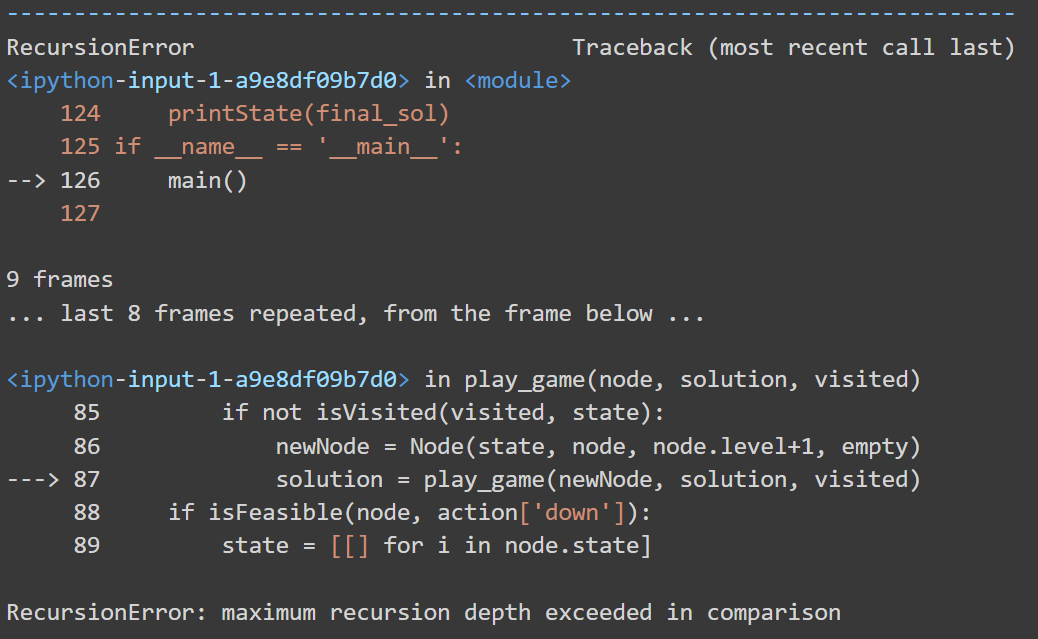

In [ ]:
#class to define a node in search space

class Node:
    def __init__(self, state, parent, level, empty):
        self.state = state
        self.parent = parent
        self.level = level
        self.empty = empty

#Check if empty block can move to a particular side

def isFeasible(node, action):
    x = node.empty[0]
    y = node.empty[1]
    if action == 3:
        return (x >=0 and x <= 2) and (y-1)>=0 and (y-1) <= 2
    elif action == 2:
        return (x+1) >=0 and (x+1) <= 2 and y>=0 and y <= 2
    elif action == 1:
        return x >=0 and x <= 2 and (y+1)>=0 and (y+1) <=2
    elif action == 0:
        return (x-1) >=0 and (x-1) <= 2 and y>=0 and y <= 2

#Goal Function

def checkFinalState(node):
    FINAL_STATE = [
        [0,1,2],
        [3,4,5],
        [6,7,8]
    ]
    for row in range(3):
        for col in range(3):
            if FINAL_STATE[row][col] != node.state[row][col]:
                return False

    return True

#Print State

def printState(sol):
    for state in sol:
        for row in state:
            for col in row:
                print(col, end=" ")
            print()
        print()

#Check if the node is already visited

def isVisited(visited, explored, pstate):
    visited.extend(explored)
    if not visited:
        return False
    for state in visited:
        for row in range(3):
            flag = 0
            for col in range(3):
                if state.state[row][col] != pstate[row][col]:
                    flag = 1
                    break
            if flag:
                break
        if not flag:
            return True
    return False

#Loop through the search space horizontally using bfs and stop when the goal state is found

def play_game(node, visited):
    action = {'top':0, 'right':1, 'left':3, 'down':2}
    explored = []
    while(len(visited)!=0):
        node = visited[0]
        for key in action:
            if key == 'top' and isFeasible(node, action['top']):
                state = [[] for i in node.state]
                for index in range(len(node.state)):
                    state[index].extend(node.state[index])
                empty = (node.empty[0]-1, node.empty[1])
                state[node.empty[0]][node.empty[1]], state[empty[0]][empty[1]] = state[empty[0]][empty[1]], state[node.empty[0]][node.empty[1]]
                if not isVisited(visited, explored, state):
                    newNode = Node(state, node, node.level+1, empty)
            elif key == 'right' and isFeasible(node, action['right']):
                state = [[] for i in node.state]
                for index in range(len(node.state)):
                    state[index].extend(node.state[index])
                empty = (node.empty[0], node.empty[1]+1)
                state[node.empty[0]][node.empty[1]], state[empty[0]][empty[1]] = state[empty[0]][empty[1]], state[node.empty[0]][node.empty[1]]
                if not isVisited(visited, explored, state):
                    newNode = Node(state, node, node.level+1, empty)
            elif key == 'down' and isFeasible(node, action['down']):
                state = [[] for i in node.state]
                for index in range(len(node.state)):
                    state[index].extend(node.state[index])
                empty = (node.empty[0]+1, node.empty[1])
                state[node.empty[0]][node.empty[1]], state[empty[0]][empty[1]] = state[empty[0]][empty[1]], state[node.empty[0]][node.empty[1]]
                if not isVisited(visited, explored, state):
                    newNode = Node(state, node, node.level+1, empty)
            elif key == 'left' and isFeasible(node, action['left']):
                state = [[] for i in node.state]
                for index in range(len(node.state)):
                    state[index].extend(node.state[index])
                empty = (node.empty[0], node.empty[1]-1)
                state[node.empty[0]][node.empty[1]], state[empty[0]][empty[1]] = state[empty[0]][empty[1]], state[node.empty[0]][node.empty[1]]
                if not isVisited(visited, explored, state):
                    newNode = Node(state, node, node.level+1, empty)
            visited.append(newNode)
            if (checkFinalState(newNode)):
                sol = []
                iter = newNode
                while (iter):
                    sol.append(iter.state)
                    iter = iter.parent
                printState(sol)
                return True
        explored.append(visited.pop(0))
    return None

def main():
    state = [
        [3,1,2],
        [4,0,5],
        [6,7,8]
    ]
    empty = (1,1)
    parent = None
    level = 0
    initial = Node(state, parent, level, empty)
    visited = [initial]
    sol = play_game(initial, visited)

if __name__ == '__main__':
    main()

Output:

0 1 2 

3 4 5 

6 7 8 


---


3 1 2 

0 4 5 

6 7 8 


---


3 1 2 

4 0 5 

6 7 8 

In [ ]:
#class for storing node metadata
class Node:
    def __init__(self, state, parent, level, empty):
        self.state = state
        self.parent = parent
        self.level = level
        self.empty = empty
    
#Check if empty block can move to a particular side

def isFeasible(node, action):
    x = node.empty[0]
    y = node.empty[1]
    if action == 3:
        return (x >=0 and x <= 2) and (y-1)>=0 and (y-1) <= 2
    elif action == 2:
        return (x+1) >=0 and (x+1) <= 2 and y>=0 and y <= 2
    elif action == 1:
        return x >=0 and x <= 2 and (y+1)>=0 and (y+1) <= 2
    elif action == 0:
        return (x-1) >=0 and (x-1) <= 2 and y>=0 and y <= 2

#Goal Function
    
def checkFinalState(node):
    FINAL_STATE = [
        [0,1,2],
        [3,4,5],
        [6,7,8]
    ]
    for row in range(3):
        for col in range(3):
            if FINAL_STATE[row][col] != node.state[row][col]:
                return False

    return True

#Print State

def printState(sol):
    for state in sol:
        for row in state:
            for col in row:
                print(col, end=" ")
            print()
        print()

#Check if this node is previously visited

def isVisited(visited, pstate):
    if not visited:
        return False
    for state in visited:
        for row in range(3):
            flag = 0
            for col in range(3):
                if state[row][col] != pstate[row][col]:
                    flag = 1
                    break
            if flag:
                break
        if not flag:
            return True
    return False

#Approximate the next optimal node to visit

def calculateCost(node, action):
    FINAL_STATE = [
        [0,1,2],
        [3,4,5],
        [6,7,8]
    ]
    state = [[] for i in node.state]
    for index in range(len(node.state)):
        state[index].extend(node.state[index])
    if action==0:
        empty = (node.empty[0]-1, node.empty[1])
        state[node.empty[0]][node.empty[1]], state[empty[0]][empty[1]] = state[empty[0]][empty[1]], state[node.empty[0]][node.empty[1]]
    elif action==1:
        empty = (node.empty[0], node.empty[1]+1)
        state[node.empty[0]][node.empty[1]], state[empty[0]][empty[1]] = state[empty[0]][empty[1]], state[node.empty[0]][node.empty[1]]
    elif action==2:
        empty = (node.empty[0]+1, node.empty[1])
        state[node.empty[0]][node.empty[1]], state[empty[0]][empty[1]] = state[empty[0]][empty[1]], state[node.empty[0]][node.empty[1]]
    elif action==3:
        empty = (node.empty[0], node.empty[1]-1)
        state[node.empty[0]][node.empty[1]], state[empty[0]][empty[1]] = state[empty[0]][empty[1]], state[node.empty[0]][node.empty[1]]
    invalid_nodes = 0
    for row in range(3):
        for col in range(3):
            if FINAL_STATE[row][col] != state[row][col]:
                invalid_nodes += 1
    return node.level+invalid_nodes+1

#At each step choose the next possible node wisely using the utility calculateCost

def play_game(node, solution, visited):
    if solution:
        return True
    if (checkFinalState(node)):
        sol = []
        iter = node
        while (iter):
            sol.append(iter.state)
            iter = iter.parent
        printState(sol)
        return True
    action = {'top':0, 'right':1, 'left':3, 'down':2}
    cost = {}
    if isFeasible(node, action['top']):
        cost[0] = calculateCost(node, action['top'])
    if isFeasible(node, action['right']):
        cost[1] = calculateCost(node, action['right'])
    if isFeasible(node, action['down']):
        cost[2] = calculateCost(node, action['down'])
    if isFeasible(node, action['left']):
        cost[3] = calculateCost(node, action['left'])
    import operator as op
    sorted_cost = dict(sorted(cost.items(), key=op.itemgetter(1)))
    visited.append(node.state)
    for key in sorted_cost:
        if key == 0:
            state = [[] for i in node.state]
            for index in range(len(node.state)):
                state[index].extend(node.state[index])
            empty = (node.empty[0]-1, node.empty[1])
            state[node.empty[0]][node.empty[1]], state[empty[0]][empty[1]] = state[empty[0]][empty[1]], state[node.empty[0]][node.empty[1]]
            if not isVisited(visited, state):
                newNode = Node(state, node, node.level+1, empty)
                solution = play_game(newNode, solution, visited)
        elif key == 1:
            state = [[] for i in node.state]
            for index in range(len(node.state)):
                state[index].extend(node.state[index])
            empty = (node.empty[0], node.empty[1]+1)
            state[node.empty[0]][node.empty[1]], state[empty[0]][empty[1]] = state[empty[0]][empty[1]], state[node.empty[0]][node.empty[1]]
            if not isVisited(visited, state):
                newNode = Node(state, node, node.level+1, empty)
                solution = play_game(newNode, solution, visited)
        elif key == 2:
            state = [[] for i in node.state]
            for index in range(len(node.state)):
                state[index].extend(node.state[index])
            empty = (node.empty[0]+1, node.empty[1])
            state[node.empty[0]][node.empty[1]], state[empty[0]][empty[1]] = state[empty[0]][empty[1]], state[node.empty[0]][node.empty[1]]
            if not isVisited(visited, state):
                newNode = Node(state, node, node.level+1, empty)
                solution = play_game(newNode, solution, visited)
        elif key == 3:
            state = [[] for i in node.state]
            for index in range(len(node.state)):
                state[index].extend(node.state[index])
            empty = (node.empty[0], node.empty[1]-1)
            state[node.empty[0]][node.empty[1]], state[empty[0]][empty[1]] = state[empty[0]][empty[1]], state[node.empty[0]][node.empty[1]]
            if not isVisited(visited, state):
                newNode = Node(state, node, node.level+1, empty)
                solution = play_game(newNode, solution, visited)
        if solution:
            return True

def main():
    state = [
        [1,2,0],
        [3,4,5],
        [6,7,8]
    ]
    empty = (0,2)
    parent = None
    level = 0
    initial = Node(state, parent, level, empty)
    solution = False
    visited = []
    solution = play_game(initial, solution, visited)

if __name__ == '__main__':
    main()

Output:

0 1 2 

3 4 5 

6 7 8 



---


1 0 2 

3 4 5 

6 7 8 



---


1 2 0 

3 4 5 

6 7 8 